In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumGothicCoding')
sns.set(font='NanumGothicCoding')

In [2]:
population = pd.read_csv("./data/경상남도_시군별 인구수 및 세대수_20240701.csv")
move_in = pd.read_csv("./data/경상남도_전입인구_20231231.csv")
move_out = pd.read_csv("./data/경상남도_전출인구_20231231.csv")
employment_rate = pd.read_csv("./data/청년고용률_20240630.csv")
unemployment_rate = pd.read_csv("./data/청년실업률_20240630.csv")

In [3]:
population.head()

,연월,행정동코드,연령대,성별코드,구분명,인구수
0,2024-01,1100000000,0,1,내국인,262001
1,2024-01,1100000000,10,1,내국인,374718
2,2024-01,1100000000,20,1,내국인,640896
3,2024-01,1100000000,30,1,내국인,713652
4,2024-01,1100000000,40,1,내국인,701808


In [4]:
move_in.head()

,연도,인구이동외부행정동코드,인구이동내부행정동코드,인구이동연령대코드,성별코드,사유코드,전입인구수
0,2023,4812125000,1100000000,3,1,1,1
1,2023,4812125000,1100000000,5,1,1,1
2,2023,4812125000,1100000000,1,1,2,1
3,2023,4812125000,1100000000,2,1,2,5
4,2023,4812125000,1100000000,3,1,2,1


In [5]:
move_out.head()

,연도,인구이동내부행정동코드,인구이동외부행정동코드,인구이동연령대코드,성별코드,사유코드,전출인구수
0,2023,1100000000,4812125000,3,1,1,4
1,2023,1100000000,4812125000,4,1,1,1
2,2023,1100000000,4812125000,6,1,1,1
3,2023,1100000000,4812125000,5,1,2,1
4,2023,1100000000,4812125000,2,1,3,2


In [6]:
employment_rate.head()

,행정동코드,청년고용률,분기
0,1000000000,46.1,20241
1,1100000000,53.3,20241
2,2600000000,45.2,20241
3,2700000000,38.2,20241
4,2800000000,45.2,20241


In [7]:
unemployment_rate.head()

,행정동코드,청년실업률,분기
0,1000000000,6.4,20241
1,1100000000,4.1,20241
2,2600000000,8.1,20241
3,2700000000,10.4,20241
4,2800000000,9.7,20241


In [8]:
age_code_dict = {
    1:	10,
    2:	20,
    3:	30,
    4:	40,
    5:	50,
    6:	60
}

reason_code_dict = {
    1: "직업",
    2: "가족",
    3: "주택",
    4: "교육",
    5: "주거환경",
    6: "자연환경",
    9: "기타"
}

area_code_dict = {
    1000000000: "전국",
    1100000000: "서울특별시",
    2600000000: "부산광역시",
    2700000000: "대구광역시",
    2800000000: "인천광역시",
    2900000000: "광주광역시",
    3000000000: "대전광역시",
    3100000000: "울산광역시",
    3600000000: "세종특별자치시",
    4100000000: "경기도",
    4200000000:	"강원도",
    4300000000: "충청북도",
    4400000000: "충청남도",
    4500000000: "전라북도",
    4600000000: "전라남도",
    4700000000: "경상북도",
    4800000000: "경상남도",
    5000000000: "제주특별자치도",
    5100000000: "강원특별자치도",
    5200000000: "전북특별자치도"
}

In [9]:
def trim_area_code(area_code):
    return (area_code//100000000)*100000000

def get_age(age_code):
    return age_code_dict[age_code]

def get_area(area_code):
    return area_code_dict[trim_area_code(area_code)]

def get_gender(gender_code):
    return "M" if gender_code == 1 else "F"

def get_reason(reason_code):
    return reason_code_dict[reason_code]

In [10]:
population['행정동'] = population['행정동코드'].apply(get_area)
population['성별'] = population['성별코드'].apply(get_gender)
population = population.drop(['행정동코드', '성별코드'], axis=1)
population.head()

,연월,연령대,구분명,인구수,행정동,성별
0,2024-01,0,내국인,262001,서울특별시,M
1,2024-01,10,내국인,374718,서울특별시,M
2,2024-01,20,내국인,640896,서울특별시,M
3,2024-01,30,내국인,713652,서울특별시,M
4,2024-01,40,내국인,701808,서울특별시,M


In [11]:
move_in['기존 지역'] = move_in['인구이동내부행정동코드'].apply(get_area)
move_in['이주 지역'] = move_in['인구이동외부행정동코드'].apply(get_area)
move_in['연령대'] = move_in['인구이동연령대코드'].apply(get_age)
move_in['성별'] = move_in['성별코드'].apply(get_gender)
move_in['사유'] = move_in['사유코드'].apply(get_reason)
move_in = move_in.drop(['인구이동외부행정동코드', '인구이동내부행정동코드', '인구이동연령대코드', '성별코드', '사유코드'], axis=1)
move_in.head()

,연도,전입인구수,기존 지역,이주 지역,연령대,성별,사유
0,2023,1,서울특별시,경상남도,30,M,직업
1,2023,1,서울특별시,경상남도,50,M,직업
2,2023,1,서울특별시,경상남도,10,M,가족
3,2023,5,서울특별시,경상남도,20,M,가족
4,2023,1,서울특별시,경상남도,30,M,가족


In [12]:
move_out['기존 지역'] = move_out['인구이동외부행정동코드'].apply(get_area)
move_out['이주 지역'] = move_out['인구이동내부행정동코드'].apply(get_area)
move_out['연령대'] = move_out['인구이동연령대코드'].apply(get_age)
move_out['성별'] = move_out['성별코드'].apply(get_gender)
move_out['사유'] = move_out['사유코드'].apply(get_reason)
move_out = move_out.drop(['인구이동외부행정동코드', '인구이동내부행정동코드', '인구이동연령대코드', '성별코드', '사유코드'], axis=1)
move_out.head()

,연도,전출인구수,기존 지역,이주 지역,연령대,성별,사유
0,2023,4,경상남도,서울특별시,30,M,직업
1,2023,1,경상남도,서울특별시,40,M,직업
2,2023,1,경상남도,서울특별시,60,M,직업
3,2023,1,경상남도,서울특별시,50,M,가족
4,2023,2,경상남도,서울특별시,20,M,주택


In [13]:
employment_rate['지역'] = employment_rate['행정동코드'].apply(get_area)
employment_rate = employment_rate.drop('행정동코드',axis=1)
employment_rate.head()

,청년고용률,분기,지역
0,46.1,20241,전국
1,53.3,20241,서울특별시
2,45.2,20241,부산광역시
3,38.2,20241,대구광역시
4,45.2,20241,인천광역시


In [39]:
employment_rate['지역'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [14]:
unemployment_rate['지역'] = unemployment_rate['행정동코드'].apply(get_area)
unemployment_rate = unemployment_rate.drop('행정동코드',axis=1)
unemployment_rate.head()

,청년실업률,분기,지역
0,6.4,20241,전국
1,4.1,20241,서울특별시
2,8.1,20241,부산광역시
3,10.4,20241,대구광역시
4,9.7,20241,인천광역시


Text(0.5, 1.0, '기간 별 경상남도 20대 인구수')

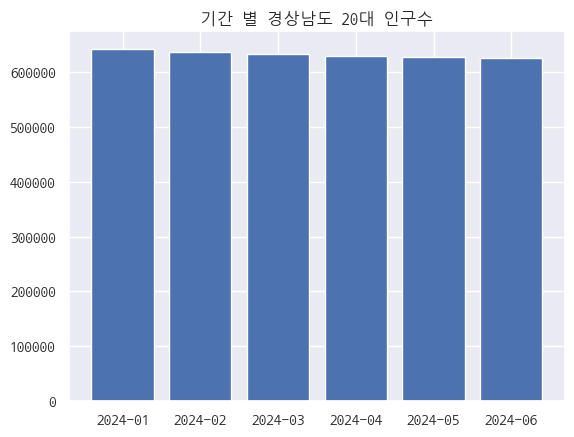

In [107]:
plt.bar(['2024-01','2024-02','2024-03','2024-04','2024-05','2024-06'], [population[(population['연령대'] == 20) & (population['행정동'] == "경상남도") & (population['연월'] == month)]['인구수'].sum() for month in ['2024-01','2024-02','2024-03','2024-04','2024-05','2024-06']])
plt.title("기간 별 경상남도 20대 인구수")

Text(0.5, 1.0, '기간 별 경상남도 20대 인구수')

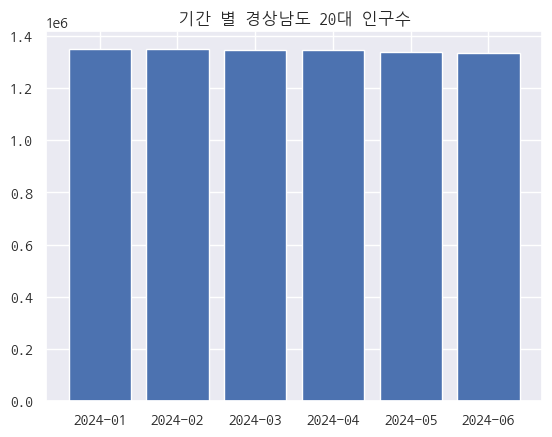

In [108]:
plt.bar(['2024-01','2024-02','2024-03','2024-04','2024-05','2024-06'], [population[(population['연령대'] == 20) & (population['행정동'] == "서울특별시") & (population['연월'] == month)]['인구수'].sum() for month in ['2024-01','2024-02','2024-03','2024-04','2024-05','2024-06']])
plt.title("기간 별 경상남도 20대 인구수")

Text(0.5, 1.0, '경상남도 20대 전출 사유')

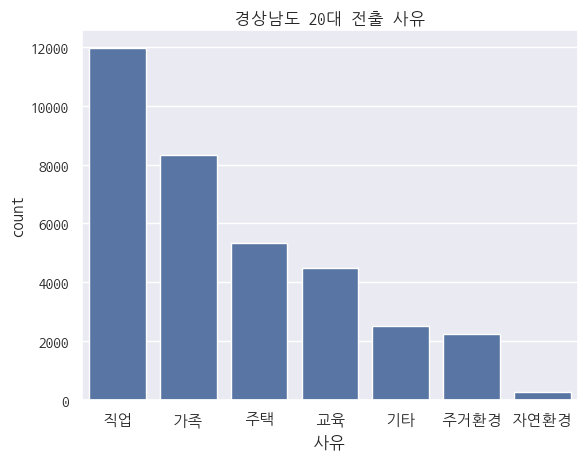

In [84]:
sns.barplot(move_out[move_out['연령대'] == 20]['사유'].value_counts()).set_title("경상남도 20대 전출 사유")

Text(0.5, 1.0, '경상남도 20대 주요 이주 지역')

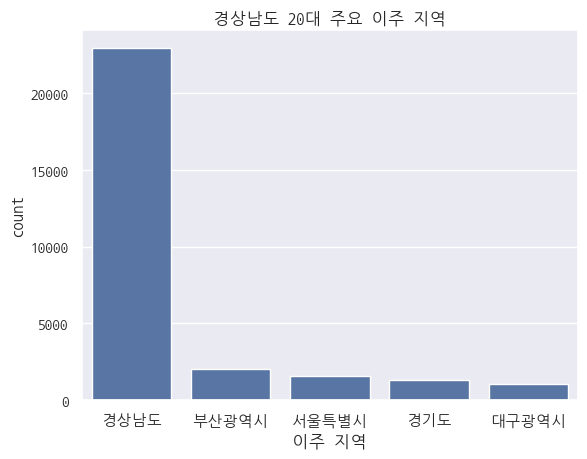

In [83]:
sns.barplot(move_out[move_out['연령대'] == 20]['이주 지역'].value_counts()[:5]).set_title("경상남도 20대 주요 이주 지역")

Text(0.5, 1.0, '지역 별 청년 고용률')

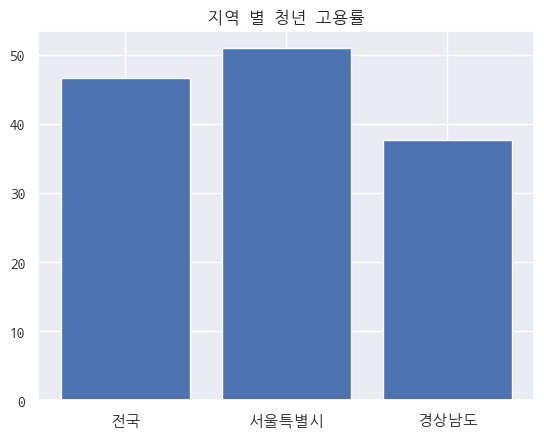

In [94]:
plt.bar(["전국", "서울특별시", "경상남도"], employment_rate[(employment_rate['분기']==20242) & (employment_rate['지역'].isin(["전국","서울특별시","경상남도"]))]['청년고용률'])
plt.title("지역 별 청년 고용률")

Text(0.5, 1.0, '지역 별 청년 실업률')

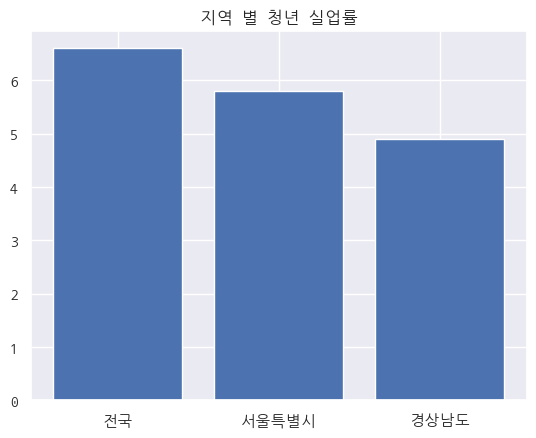

In [95]:
plt.bar(["전국", "서울특별시", "경상남도"], unemployment_rate[(employment_rate['분기']==20242) & (unemployment_rate['지역'].isin(["전국","서울특별시","경상남도"]))]['청년실업률'])
plt.title("지역 별 청년 실업률")